In [8]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-12-14 09:08:16.853798


# Kynttiläkaavioita ja liukuvia keskiarvoja

Seuraavassa käytetään datan noutoon **pandas-datareader** -kirjastoa, jonka voit asentaa komentoriviltä komennollaconda `install -c anaconda pandas-datareader`

Seuraavassa käytetään **mplfinance**-kirjastoa, jonka voit asentaa komentoriviltä komennolla
`conda install -c conda-forge mplfinance`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import mplfinance as mpf

## Datan nouto

Kurssihistorioita voit noutaa Yahoo Finance -palvelusta. Voit googlata muiden osakkeiden nimiä. Esimerkiksi halulla 'yahoo finance kemira' löydät Kemiran tunnuksen Yahoossa.

In [3]:
elisa = web.DataReader('ELISA.HE', start='2022-1-1', data_source='yahoo')

In [4]:
elisa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-03,54.779999,54.200001,54.200001,54.459999,159243.0,52.473469
2022-01-04,55.279999,54.220001,54.500000,54.900002,304690.0,52.897423
2022-01-05,55.200001,54.419998,54.799999,54.419998,292389.0,52.434929
2022-01-07,54.599998,53.540001,54.400002,53.639999,401992.0,51.683380
2022-01-10,53.639999,52.160000,53.639999,52.860001,359226.0,50.931835
...,...,...,...,...,...,...
2022-12-07,51.720001,51.020000,51.400002,51.099998,589049.0,51.099998
2022-12-08,51.160000,49.639999,51.060001,50.500000,254830.0,50.500000
2022-12-09,50.980000,50.380001,50.480000,50.919998,167723.0,50.919998


**Tärkeää**: Seuraavassa oletetaan, että datasta löytyy yllä näkyvällä tavalla nimetyt muuttujat (sarakkeet): High, Low, Open, Close, Volume.

## Kynttiläkaavio

Parametri `show_nontrading=True` näyttää tyhjän välin viikonloppujen kohdalla.

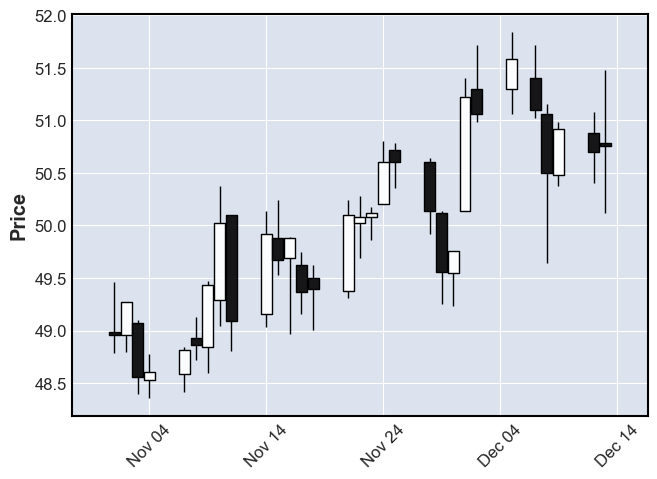

In [5]:
mpf.plot(elisa['2022-11':], type='candle', show_nontrading=True)

## Vaihdon määrä

Parametri **volume=True** lisää kaavioon vaihdon määrän (Volume).

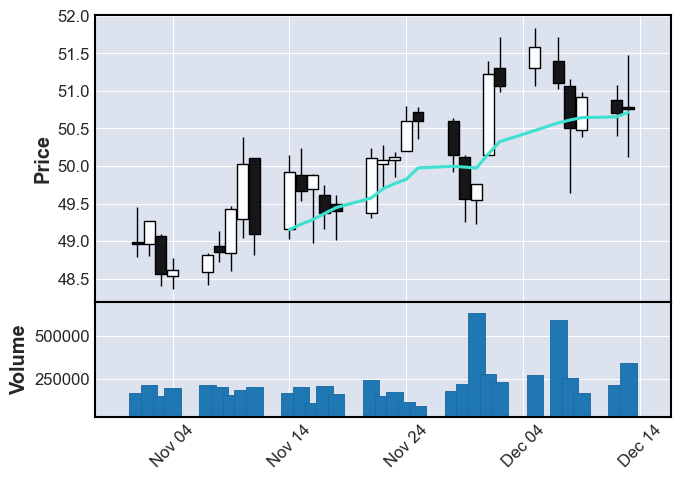

In [6]:
mpf.plot(elisa['2022-11':], type='candle', mav=(10), volume=True, show_nontrading=True)

## Liukuvia keskiarvoja

Parametri **mav=(50, 150)** piirtää 50 päivän ja 150 päivän liukuvat keskiarvot. 

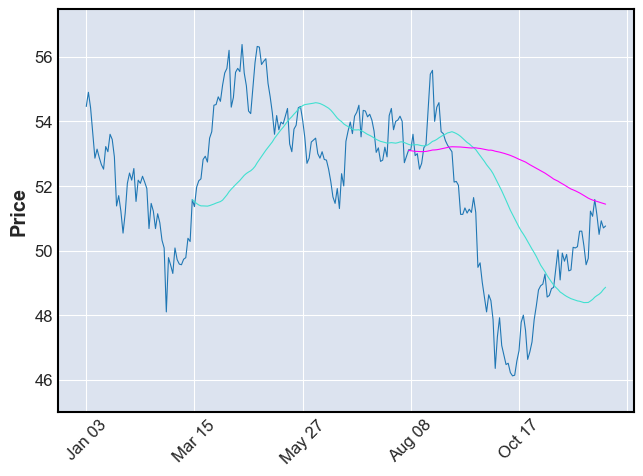

In [7]:
mpf.plot(elisa['2022':], type='line', mav=(50, 150))

## Lisätietoa

https://github.com/matplotlib/mplfinance